#### If you Like My Work **Please UpVote**

Heart Disease UCI dataset is been created from the Cleveland database with the subset of 14 attributes. 

In this kernel I am going to visualize few variables **with respect to the target data** and predict the target variable using different classification algorithms.


This dataset is a classification type datset with two classifications 0 or 1. 
The target variable is angiographic disease status => 
Value 0: < 50% diameter narrowing  
Value 1: > 50% diameter narrowing in any major vessel.  

Lets import the dataset and analyse the data

In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import os
print(os.listdir("../input"))


['heart.csv']


In [2]:
heart_dataset = pd.read_csv('../input/heart.csv')
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Description of the Columns in the dataset
1. Age - Age of the person in Years

1. Sex - Gender of the person (1-> male, 0 -> female)

1. CP - Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

1. trestbps - Resting Blood Pressure in mm Hg on admission to the hospital

1. chol - Serum Cholestrol in mg/dl 

1. fbs - Fasting Blood Sugar > 120 mg/dl (1 = true "> 120 mg/dl”, 0 = false "< 120 mg/dl")

1. restecg - Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality "T wave inversions and/or ST elevation or depression of > 0.05 mV”, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

1. thalach - maximum heart rate achieved

1. exang - exercise induced angina (1 = yes, 0 = no)

1. oldpeak - ST depression induced by exercise relative to rest

1. slope - the slope of the peak exercise ST segment (1 = up sloping, 2 = flat, 3 = down sloping)

1. ca - number of major vessels colored by flourosopy (0-3)

1. thal - (1 = normal, 2 = fixed defect, 3 = reversable defect)

1. target - diagnosis of heart disease (angiographic disease status 0 = < 50% diameter narrowing,              1 = > 50% diameter narrowing in any major vessel attributes)  


In [3]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


from the count we can see that there are no missing data. Lets analyse variables like Age, Gender, ChestPain type and Thal with respect to the target varaible.

Lets split the dataset into two parts for analysis purpose. data with target = 1 and target = 0

In [4]:
data_with_disease = heart_dataset[heart_dataset['target'] == 1]
data_without_disease = heart_dataset[heart_dataset['target'] == 0]

#### 1: relation between age and target variable
which age group had suffered from heart disease

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


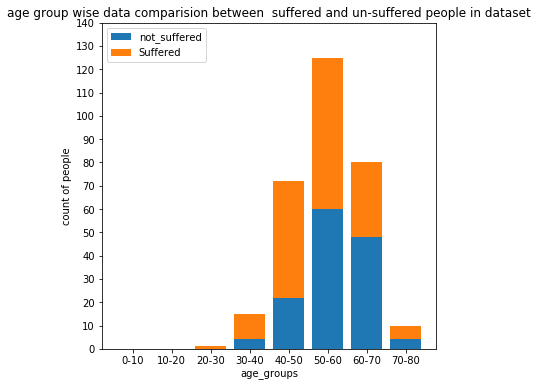

In [5]:
data_with_disease['age'] = ((data_with_disease['age']-(data_with_disease['age']%10))/10)
data_without_disease['age'] = ((data_without_disease['age']-(data_without_disease['age']%10))/10) 

N=8
ind =np.arange(N)

disease_data = [0]*8
no_disease_data = [0]*8

for i in range(0,len(data_with_disease)):
    disease_data[int(data_with_disease['age'][i])] += 1
for i in range(165,165+len(data_without_disease)):
    no_disease_data[int(data_without_disease['age'][i])] += 1 

plt.figure(figsize = (6,6))
p1 = plt.bar(ind,no_disease_data)
p2 = plt.bar(ind,disease_data,bottom = no_disease_data)
plt.xticks(ind, ('0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'))
plt.yticks(np.arange(0,150,10))
plt.xlabel('age_groups')
plt.ylabel('count of people')
plt.legend((p1[0], p2[0]), ('not_suffered', 'Suffered'))
plt.title('age group wise data comparision between  suffered and un-suffered people in dataset')
plt.show()


it is significant that most of suffered people are between 40 to 70.

From suffered people which age group is highest

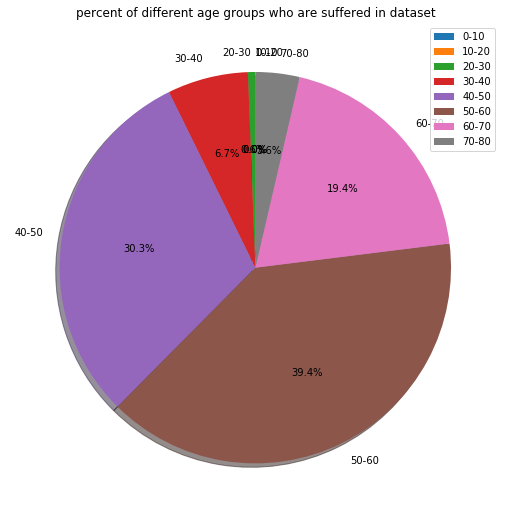

In [6]:
plt.figure(figsize = (9,9))
lables = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
sizes = disease_data
explode = [0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(sizes, labels = lables, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
plt.legend()
plt.title('percent of different age groups who are suffered in dataset')
plt.show()

from the pie chart we can see that people who have angiographic disease status =1 are most from the age group 50-60. Large percent are between age 40-70.  

#### 2: relation between gender and target variable
what is the count of people in dataset who have the status = 1 and who have status = 0 from the gender perspective.

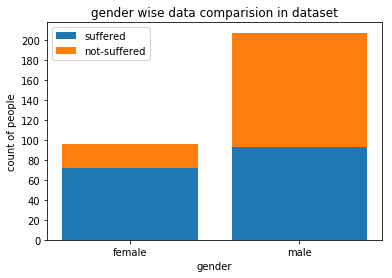

In [7]:
suffered_data = [0]*2
un_suffered_data = [0]*2  
for i in range(0,len(data_with_disease)):
    suffered_data[int(data_with_disease['sex'][i])] += 1
    
for i in range(165,165+len(data_without_disease)):
    un_suffered_data[int(data_without_disease['sex'][i])] += 1 

N=2
ind=np.arange(N)

p1 = plt.bar(ind,suffered_data)
p2 = plt.bar(ind,un_suffered_data,bottom = suffered_data)
plt.xticks(ind, ('female','male'))
plt.yticks(np.arange(0,210,20))
plt.xlabel('gender')
plt.ylabel('count of people')
plt.legend((p1[0], p2[0]), ('suffered', 'not-suffered'))
plt.title('gender wise data comparision in dataset')
plt.show()

#### 3: relation between Chestpaintype, Gender and target-

 spread of chest pain types and relation with Gender

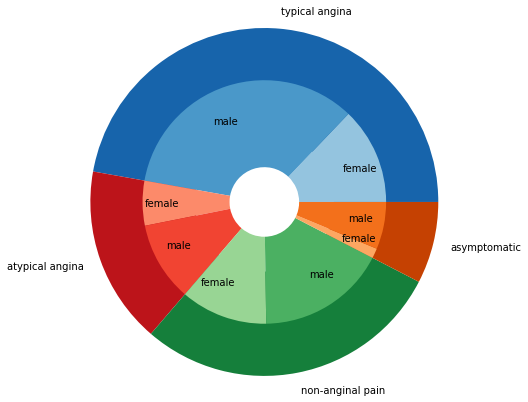

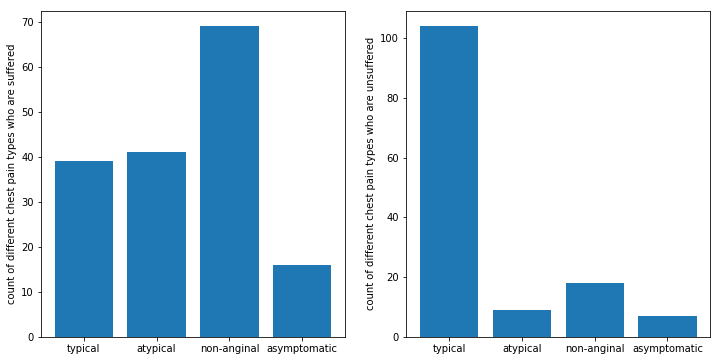

In [8]:
chest_pains_count=[0]*4
chest_pains_count_suffered=[0]*4
chest_pains_count_unsuffered=[0]*4
chest_pains_with_gender = [0]*8
types = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
gender_with_types = ['female','male','female','male','female','male','female','male']

#make data
for i in range(0,len(heart_dataset)):
    chest_pains_count[heart_dataset['cp'][i]]+= 1
    if(heart_dataset['sex'][i] == 0):
        chest_pains_with_gender[heart_dataset['cp'][i]*2]+=1
    else:
        chest_pains_with_gender[(heart_dataset['cp'][i]*2)+1]+=1
#choose colors
a, b, c ,d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges]

#outer ring

fig, ax = plt.subplots()
ax.axis('equal')
out_pie, _ =ax.pie(chest_pains_count, radius =2, labels =types, colors = [a(0.8), b(0.8), c(0.8), d(0.8)])
plt.setp(out_pie, width= 1.2)

#inner ring
in_pie, _ =ax.pie(chest_pains_with_gender, radius =1.4, labels = gender_with_types, labeldistance=0.7,
                  colors = [a(0.4),a(0.6),b(0.4),b(0.6),c(0.4),c(0.6),d(0.4),d(0.6)]) 
plt.setp(in_pie, width = 1)
plt.show() 

for i in range(0,len(data_with_disease)):
    chest_pains_count_suffered[data_with_disease['cp'][i]]+= 1
for i in range(165,165+len(data_without_disease)):
    chest_pains_count_unsuffered[data_without_disease['cp'][i]]+= 1  

    types = ['typical', 'atypical', 'non-anginal', 'asymptomatic']
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.bar(types,chest_pains_count_suffered,width =0.8)
plt.ylabel('count of different chest pain types who are suffered')

plt.subplot(1,2,2)
plt.bar(types,chest_pains_count_unsuffered,width =0.8)
plt.ylabel('count of different chest pain types who are unsuffered')
plt.show()   


Pie chart above defines the spread of different types of chest pains in the dataset and split of chest pains Gender. The bar graphs show spread of the chest pain types in both suffered and unsuffered data

#### 4: relation between thal and target variable

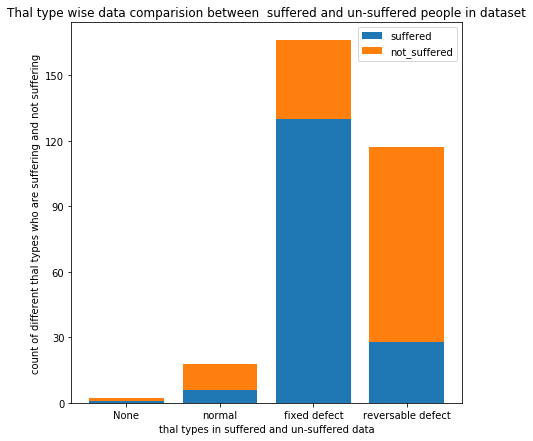

In [9]:
thal_types_suffered = [0]*4
thal_types_unsuffered = [0]*4

N =4
ind = np.arange(N)
for i in range(0,len(heart_dataset)):
    if(heart_dataset['target'][i] == 1):thal_types_suffered[heart_dataset['thal'][i]] +=1
    else:thal_types_unsuffered[heart_dataset['thal'][i]] += 1

plt.figure(figsize = (7,7))
p1 = plt.bar(ind,thal_types_suffered)
p2 = plt.bar(ind,thal_types_unsuffered,bottom = thal_types_suffered)
plt.xticks(ind, ('None', 'normal', 'fixed defect', 'reversable defect'))
plt.yticks(np.arange(0,175,30))
plt.xlabel('thal types in suffered and un-suffered data')
plt.ylabel('count of different thal types who are suffering and not suffering')
plt.legend((p1[0], p2[0]), ('suffered', 'not_suffered'))
plt.title('Thal type wise data comparision between  suffered and un-suffered people in dataset')
plt.show()


All the data are in numbers but few are categorical data replace them with categories

The features which are categories are sex, chestpain type(cp 0,1,2,3),fasting blood sugar(>120 yes or no),
resting ecg(restecg  0,1,2),excercise angina(yes or no),slope(0,1,2),thal(1:normal,2:fixed,3:reversable)

we replace categorical data with dummy variables and avoid dummy variable trap by considering
only (n-1) categories in ecah categoricla data field. 

replacing data is not requried for sex, fasting bp, excercise angina

replace rest of fields with categorical data

In [10]:
heart_dataset['cp'][heart_dataset['cp'] == 0] = 'typical angina'
heart_dataset['cp'][heart_dataset['cp'] == 1] = 'atypical angina'
heart_dataset['cp'][heart_dataset['cp'] == 2] = 'non-anginal pain'
heart_dataset['cp'][heart_dataset['cp'] == 3] = 'asymptomatic'

heart_dataset['restecg'][heart_dataset['restecg'] == 0] = 'ecg1'
heart_dataset['restecg'][heart_dataset['restecg'] == 1] = 'ecg2'
heart_dataset['restecg'][heart_dataset['restecg'] == 2] = 'ecg3'

heart_dataset['slope'][heart_dataset['slope'] == 0] = 'slope1'
heart_dataset['slope'][heart_dataset['slope'] == 1] = 'slope2'
heart_dataset['slope'][heart_dataset['slope'] == 2] = 'slope3'

heart_dataset['thal'][heart_dataset['thal'] == 0] = 'None'
heart_dataset['thal'][heart_dataset['thal'] == 1] = 'normal'
heart_dataset['thal'][heart_dataset['thal'] == 2] = 'fixed'
heart_dataset['thal'][heart_dataset['thal'] == 3] = 'reversable'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.

### delimiting outliers

Text(0, 0.5, 'exang')

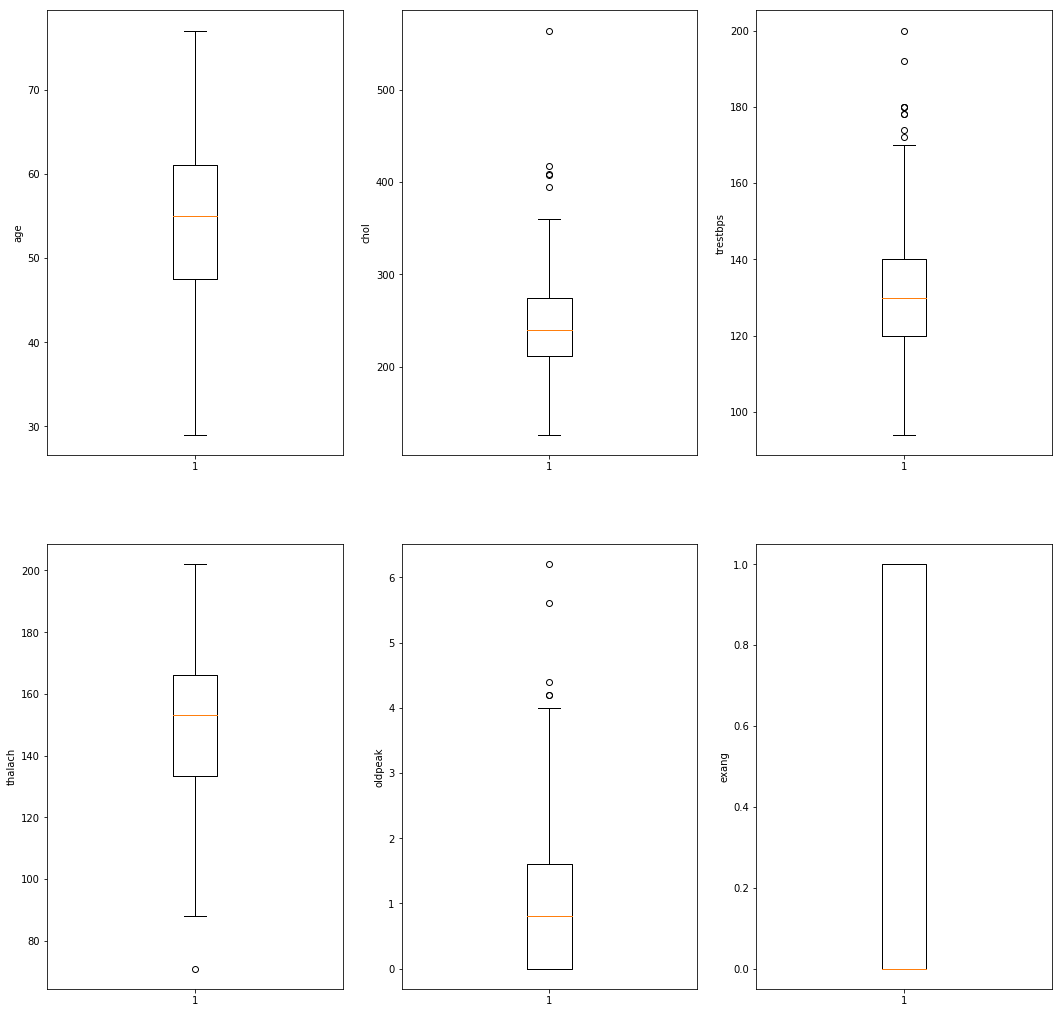

In [11]:
plt.figure(figsize = (18,18))
plt.subplot(2,3,1)
plt.boxplot('age', data = heart_dataset)
plt.ylabel('age')
plt.subplot(2,3,2)
plt.boxplot('chol', data = heart_dataset) 
plt.ylabel('chol')
plt.subplot(2,3,3)
plt.boxplot('trestbps', data = heart_dataset )
plt.ylabel('trestbps')
plt.subplot(2,3,4)
plt.boxplot('thalach', data = heart_dataset)
plt.ylabel('thalach')
plt.subplot(2,3,5)
plt.boxplot('oldpeak', data = heart_dataset)
plt.ylabel('oldpeak')
plt.subplot(2,3,6)
plt.boxplot('exang', data = heart_dataset)
plt.ylabel('exang')

remove the row with extreme outlier. Impute the other outliers such that the mean and median values before and after imputing doesn't change much.

In [12]:
for i in range(0,len(heart_dataset)):
    if(heart_dataset['chol'][i] > 360):
        heart_dataset['chol'][i] = int(heart_dataset['chol'][i] + heart_dataset['chol'].median())/2    
    if(heart_dataset['trestbps'][i] > 170):
        heart_dataset['trestbps'][i] = int(heart_dataset['trestbps'][i] + heart_dataset['trestbps'].median())/2    
    if(heart_dataset['oldpeak'][i] > 4):
        heart_dataset['oldpeak'][i] = int(heart_dataset['oldpeak'][i] + heart_dataset['oldpeak'].median())/2 

heart_dataset = heart_dataset.drop(85) # chol value is extremely outside the range
heart_dataset = heart_dataset.drop(48)  # thal is none
heart_dataset = heart_dataset.drop(281) # thal is none



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


dummy variables for categorical data. train test split and feature scaling

In [13]:
heart_dataset = pd.get_dummies(heart_dataset, drop_first=True)

X = heart_dataset
X=X.drop(['target'],axis =1)
y = heart_dataset['target']

# train test split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.15, random_state =0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_x = sc_X.fit_transform(train_x)
test_x = sc_X.transform(test_x)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


#### model selection 

Lets compare the classification prediction algorithms on the dataset 

In [14]:
#1. logistic regression----------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)

from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(test_y,y_pred)
print(cm_logistic)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv=10)
print(' ')
print('accuracy')
print(accuracies.mean())
print(' ')
print('standard deviation')
print(accuracies.std())

from sklearn.metrics import f1_score
f1_score(test_y,y_pred)

[[18  5]
 [ 5 17]]
 
accuracy
0.8356125356125356
 
standard deviation
0.06805377032101455


0.7727272727272727

In [15]:
#2.K-Nearest Neighbours----------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p=2)
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)


cm_knn = confusion_matrix(test_y,y_pred)
print(cm_knn)


accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv=10)
print(' ')
print('accuracy')
print(accuracies.mean())
print(' ')
print('standard deviation')
print(accuracies.std())

f1_score(test_y,y_pred)


[[22  1]
 [ 7 15]]
 
accuracy
0.8157663817663818
 
standard deviation
0.057449604082861365


0.7894736842105263

find the best parameters for KNN. GridSearch is a method where it runs the specified classifier on different parameters and returns the best parameter fit based on the scoring method specified.

In [16]:

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[2,3,4,5,6,7,8], 'metric':['minkowski'],'p':[2]}]
gridsearch = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'f1',
                          cv=10)
gridsearch = gridsearch.fit(train_x,train_y)
best_params_knn = gridsearch.best_params_
print(best_params_knn)

{'metric': 'minkowski', 'n_neighbors': 6, 'p': 2}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
#3.SVM-------------------------------------------------------------------------------------------

from sklearn.svm import SVC
classifier = SVC(C=10,kernel = 'rbf',
                 gamma=0.01,
                 random_state = 0)
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)

cm_svm = confusion_matrix(test_y,y_pred)
print(cm_svm)

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv=10)
print(' ')
print('accuracy')
print(accuracies.mean())
print(' ')
print('standard deviation')
print(accuracies.std())


f1_score(test_y,y_pred)


[[19  4]
 [ 3 19]]
 
accuracy
0.8433162393162392
 
standard deviation
0.07468638792811477


0.8444444444444444

find best parameters for the SVM through gridsearch

In [18]:
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100],'kernel' : ['rbf'], 'gamma':[0.1,0.01,0.05,0.005]},
               {'C':[1, 10, 100], 'kernel' :['poly'], 'degree' :[1,2,3,4]}]
gridsearch = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'f1',
                          cv=10)
gridsearch = gridsearch.fit(train_x,train_y)
best_accuracy_SVM = gridsearch.best_score_
best_params_SVM = gridsearch.best_params_
print(best_params_SVM)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
#4.Decision Tree --------------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy', random_state =0)
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)


cm_DecisionTree = confusion_matrix(test_y,y_pred)
print(cm_DecisionTree)

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv=10)
print(' ')
print('accuracy')
print(accuracies.mean())
print(' ')
print('standard deviation')
print(accuracies.std())


f1_score(test_y,y_pred)

[[18  5]
 [ 5 17]]
 
accuracy
0.7575897435897436
 
standard deviation
0.05663732852323211


0.7727272727272727

In [20]:
#5.Random Forest-------------------------------------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =100, criterion ='gini', random_state = 0)
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)


cm_RandomForest = confusion_matrix(test_y,y_pred)
print(cm_RandomForest)

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv=10)
print(' ')
print('accuracy')
print(accuracies.mean())
print(' ')
print('standard deviation')
print(accuracies.std())

f1_score(test_y,y_pred)



[[17  6]
 [ 4 18]]
 
accuracy
0.8393048433048433
 
standard deviation
0.07894960947153255


0.7826086956521738

In [21]:
parameters = [ {'n_estimators':[10,100,200,300,400,500,600,700], 'criterion':['entropy']},
                {'n_estimators':[10,100,200,300,400,500,600,700], 'criterion':['gini']}]
gridsearch = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'f1',
                          cv=10)
gridsearch = gridsearch.fit(train_x,train_y)
best_accuracy_forest = gridsearch.best_score_
best_params_forest = gridsearch.best_params_
print(best_params_forest)

{'criterion': 'gini', 'n_estimators': 100}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


from the models SVM has shown better results with f1-score of 84.4% and accuracy 84.3% and std 7.46%. This doesn't mean that SVM is the best. Because of the low no of samples in dataset other algorithms didn't perform well but if samples were more then this results might change. 